In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

In [3]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
dataset.loc[dataset['Name'] == 'Life of Pi']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8219,Life of Pi,(2012),127 min,"Adventure, Drama, Fantasy",7.9,"591,417",Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain


In [5]:
dataset.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
dataset.dropna(subset = ['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [7]:
dataset.shape

(5659, 10)

In [8]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [9]:
dataset['Name'] = dataset['Name'].str.extract('([A-Za-z\s\'\-]+)')

In [10]:
dataset['Year'] = dataset['Year'].str.replace('(', '').str.replace(')', '')
dataset['Year'] = pd.to_numeric(dataset['Year'])

In [11]:
dataset['Duration'] = dataset['Duration'].str.replace(' min', '')
dataset['Duration'] = pd.to_numeric(dataset['Duration'])

In [12]:
dataset.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [13]:
dataset['Votes'].unique()

array(['8', '35', '827', ..., '70,344', '408', '1,496'], dtype=object)

In [14]:
dataset['Votes'] = dataset['Votes'].str.replace(',', '')
dataset['Votes'] = pd.to_numeric(dataset['Votes'])

In [15]:
dataset['Genre'].nunique()

376

In [16]:
all_genres = dataset['Genre'].str.get_dummies(sep=', ')

In [17]:
dataset = pd.concat([dataset, all_genres], axis=1)

In [18]:
dataset['Music'] += dataset['Musical']

In [19]:
dataset.drop(['Musical'], axis=1, inplace=True)

In [20]:
dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [21]:
dataset.drop(['Genre'], axis=1, inplace=True)

In [22]:
import seaborn as sns

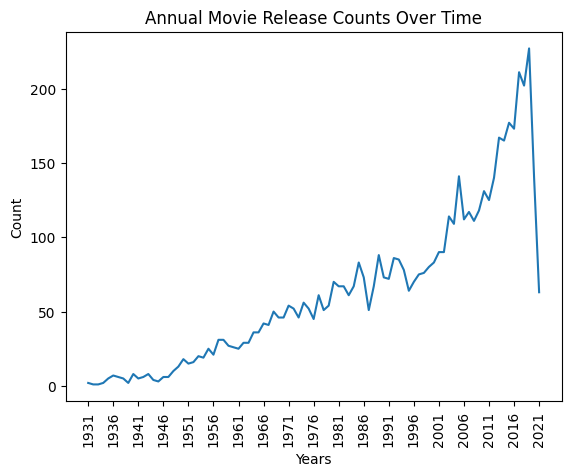

In [23]:
ax = sns.lineplot(data=dataset['Year'].value_counts().sort_index())
tick_positions = range(min(dataset['Year']), max(dataset['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")
plt.show()

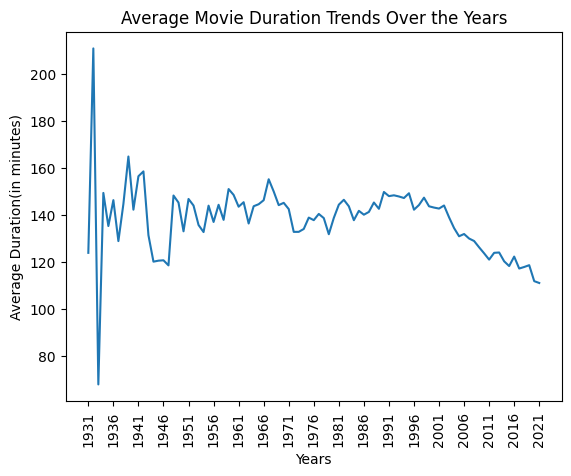

In [24]:
ax = sns.lineplot(data=dataset.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
tick_positions = range(min(dataset['Year']), max(dataset['Year']) + 1, 5)
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

In [25]:
genre_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
                 'Music', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport',
                 'Thriller', 'War', 'Western']

genre_counts = dataset[genre_columns].sum()

genre_counts_sorted = genre_counts.sort_values(ascending=False)

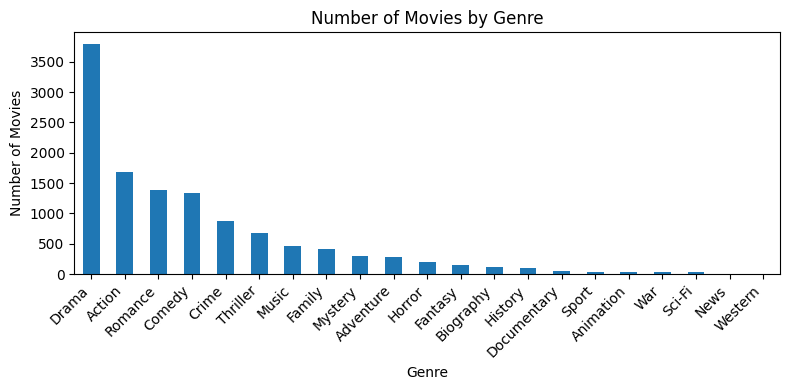

In [26]:
plt.figure(figsize=(8, 4))
genre_counts_sorted.plot(kind='bar')
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
dataset['Actor 1'].nunique()

1960

In [28]:
director_mean_rating = dataset.groupby('Director')['Rating'].transform('mean')
dataset['Director_encoded'] = director_mean_rating

In [29]:
actor1_mean_rating = dataset.groupby('Actor 1')['Rating'].transform('mean')
dataset['Actor1_encoded'] = actor1_mean_rating

In [30]:
actor2_mean_rating = dataset.groupby('Actor 2')['Rating'].transform('mean')
dataset['Actor2_encoded'] = actor2_mean_rating

In [31]:
actor3_mean_rating = dataset.groupby('Actor 3')['Rating'].transform('mean')
dataset['Actor3_encoded'] = actor3_mean_rating

In [32]:
# dataset.drop(['Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)

In [33]:
dataset.head()

,Name,Year,Duration,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Action,...,Romance,Sci-Fi,Sport,Thriller,War,Western,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,Gadhvi,2019,109,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0,...,0,0,0,0,0,0,7.000000,6.850000,7.000000,7.000000
3,Yaaram,2019,110,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0,...,1,0,0,0,0,0,4.400000,5.420000,4.400000,4.450000
5,Aur Pyaar Ho Gaya,1997,147,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0,...,0,0,0,0,0,0,5.313333,4.788889,5.786667,5.872727
6,Yahaan,2005,142,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0,...,1,0,0,0,1,0,7.383333,5.435000,6.933333,6.500000
8,A Question Mark,2012,82,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0,...,0,0,0,1,0,0,5.600000,5.600000,5.883333,5.600000


In [34]:
dataset.columns

Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded'],
      dtype='object')

In [35]:
X = dataset.drop(['Name', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)

In [36]:
y =dataset['Rating']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=42)

In [39]:
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
y_pred = regressor.predict(X_test)

In [42]:
mean_squared_error(y_test, y_pred)

0.3431959540636042

In [43]:
r2_score(y_test, y_pred)

0.814663355383647

In [44]:
dataset.columns

Index(['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Mystery', 'News', 'Romance', 'Sci-Fi',
       'Sport', 'Thriller', 'War', 'Western', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded'],
      dtype='object')

In [45]:
X.columns

Index(['Year', 'Duration', 'Votes', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded'],
      dtype='object')

In [46]:
def process_new_data(new_data, training_columns):
    df = pd.DataFrame(new_data)
    df['Name'] = df['Name'].str.extract('([A-Za-z\s\'\-]+)')
    df['Year'] = df['Year'].str.replace('(', '').str.replace(')', '')
    df['Year'] = pd.to_numeric(df['Year'])
    df['Duration'] = df['Duration'].str.replace(' min', '')
    df['Duration'] = pd.to_numeric(df['Duration'])
    df['Votes'] = df['Votes'].str.replace(',', '')
    df['Votes'] = pd.to_numeric(df['Votes'])

    # Handle Genre - Ensure all columns from training are present, avoid duplicates
    all_genres = df['Genre'].str.get_dummies(sep=', ').add_prefix('Genre_') # Prefix genre columns
    for col in training_columns:
        if col not in all_genres.columns:
            all_genres[col] = 0  # Add missing columns with 0s

    df = pd.concat([df, all_genres], axis=1)
    df.drop(['Genre'], axis=1, inplace=True)

    # Handle missing values when encoding directors and actors
    director_mean_rating = dataset.groupby('Director')['Rating'].mean()
    df['Director_encoded'] = df['Director'].map(director_mean_rating).fillna(director_mean_rating.mean()) # Fill NaN with average rating

    actor1_mean_rating = dataset.groupby('Actor 1')['Rating'].mean()
    df['Actor1_encoded'] = df['Actor 1'].map(actor1_mean_rating).fillna(actor1_mean_rating.mean())

    actor2_mean_rating = dataset.groupby('Actor 2')['Rating'].mean()
    df['Actor2_encoded'] = df['Actor 2'].map(actor2_mean_rating).fillna(actor2_mean_rating.mean())

    actor3_mean_rating = dataset.groupby('Actor 3')['Rating'].mean()
    df['Actor3_encoded'] = df['Actor 3'].map(actor3_mean_rating).fillna(actor3_mean_rating.mean())

    df.drop(['Name', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=True)

    df_unique = df.loc[:, ~df.columns.duplicated()]

    # Reorder columns to match training data
    df_unique = df_unique[training_columns]  # Ensure the order of columns matches the training data

    predicted_rating = regressor.predict(df_unique)

    return predicted_rating[0]

In [47]:
training_columns = regressor.feature_names_in_

### We can individually check the ratings of any movie based on the required data for prediction. We have predicted the ratings of two movies, which are as follows:

# 1.   **Life of Pi:**
  * The predicted rating of the movie is **`7.85`**, while the original rating is **`7.9`**

In [48]:
data1 = {'Name': ['Life of Pi'],
        'Year': ['2016'],
        'Duration' : ['127'],
        'Rating': [7.9],
        'Votes': ['591,417'],
        'Genre' : ['Adventure, Drama'],
        'Director': ['Ang Lee'],
        'Actor 1': ['Suraj Sharma'],
        'Actor 2': ['Irrfan Khan'],
        'Actor 3': ['Adil Hussain']}

In [49]:
process_new_data(data1, training_columns)

7.857999999999993

# 2.   **3 Idiots:**
  * The predicted rating of the movie is **`8.23`**, while the original rating is **`8.4`**

In [50]:
data2 = {'Name': ['3 Idiots'],
        'Year': ['2009'],
        'Duration' : ['170'],
        'Rating': [8.4],
        'Votes': ['357,889'],
        'Genre' : ['Comedy, Drama'],
        'Director': ['Rajkumar Hirani'],
        'Actor 1': ['Aamir Khan'],
        'Actor 2': ['Madhavan'],
        'Actor 3': ['Mona Singh']}

In [51]:
process_new_data(data2, training_columns)

8.222000000000001